In [1]:
from numpy import load
from numpy import zeros
from numpy import ones, expand_dims, repeat
from numpy.random import randint
from tensorflow.keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from tensorflow.keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from matplotlib import pyplot

In [2]:
!nvidia-smi

Mon Apr 10 11:54:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 463.15       Driver Version: 463.15       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K40c          TCC  | 00000000:01:00.0 Off |                    0 |
| 26%   50C    P8    22W / 235W |     10MiB / 11448MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


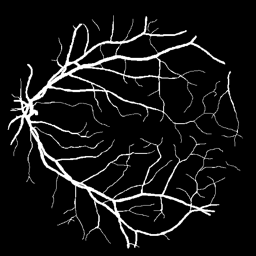


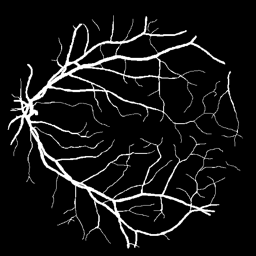


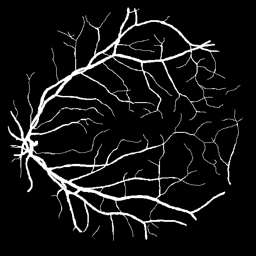


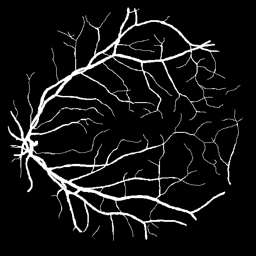


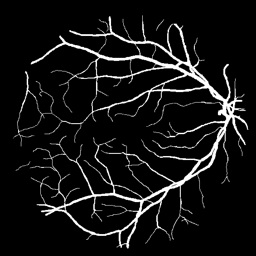


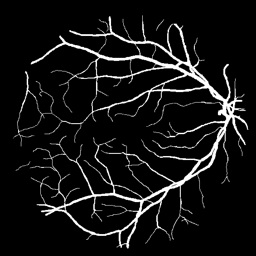


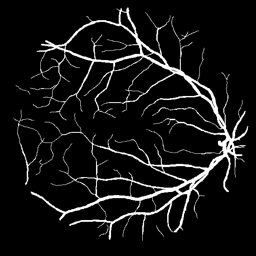


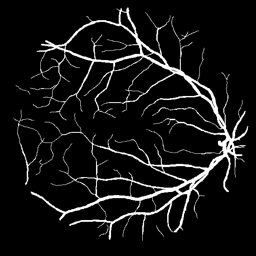


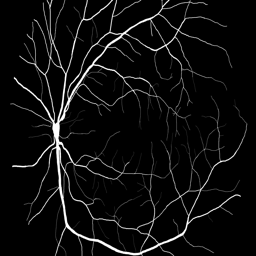


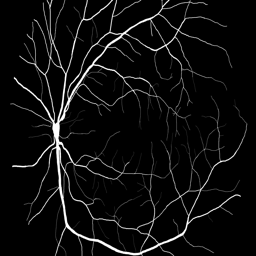


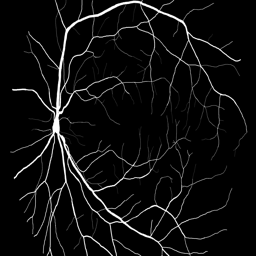


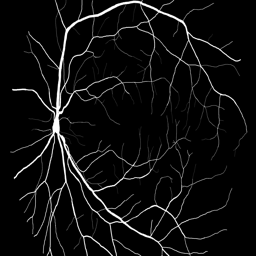


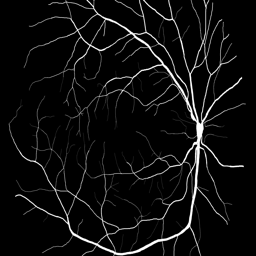


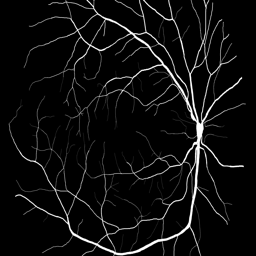


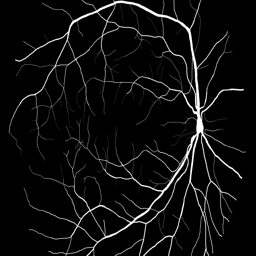


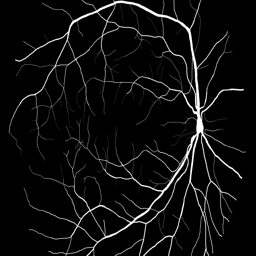

In [3]:
import os
import numpy as np
from PIL import Image
import ipyplot

images_path='C:\\Users\\HP\\ga3\\1st_manual'

training_data = []
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 training_data.append(np.asarray(image))
a=np.array(training_data)

vertical_img=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_TOP_BOTTOM)
 vertical_img.append(np.asarray(img))
vertical_img=np.array(vertical_img) 

horizontal_img=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_LEFT_RIGHT)
 horizontal_img.append(np.asarray(img))
horizontal_img=np.array(horizontal_img)

vertical_img_flip=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_TOP_BOTTOM)
 img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
 vertical_img_flip.append(np.asarray(img))
vertical_img_flip=np.array(vertical_img_flip) 

ipyplot.plot_images(a[[0]])
ipyplot.plot_images(vertical_img[[0]])
ipyplot.plot_images(horizontal_img[[0]])
ipyplot.plot_images(vertical_img_flip[[0]])

images_path='C:\\Users\\HP\\ga3\\HRF\\manual1'

hrf = []
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 hrf.append(np.asarray(image))
hrf=np.array(hrf)

hrf_v=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_TOP_BOTTOM)
 hrf_v.append(np.asarray(img))
hrf_v=np.array(hrf_v)

hrf_h=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_LEFT_RIGHT)
 hrf_h.append(np.asarray(img))
hrf_h=np.array(hrf_h)

hrf_vh=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_TOP_BOTTOM)
 img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
 hrf_vh.append(np.asarray(img))
hrf_vh=np.array(hrf_vh)

ipyplot.plot_images(hrf[[0]])
ipyplot.plot_images(hrf_v[[0]])
ipyplot.plot_images(hrf_h[[0]])
ipyplot.plot_images(hrf_vh[[0]])

In [4]:
img=np.concatenate((a,vertical_img, horizontal_img, vertical_img_flip, hrf, hrf_v, hrf_h, hrf_vh))
dataInput=expand_dims(img, axis=-1)
dataInput=repeat(dataInput, 3, axis=-1)
dataInput.shape

(260, 256, 256, 3)


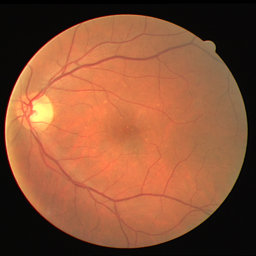


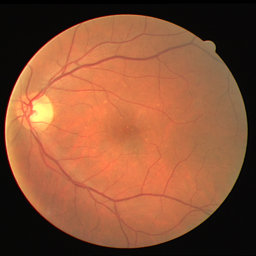


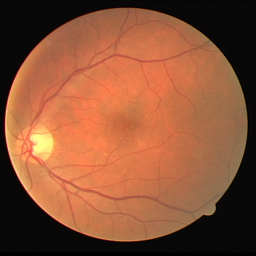


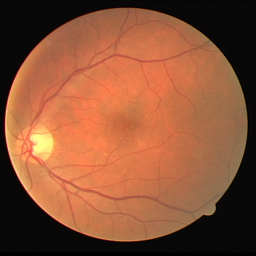


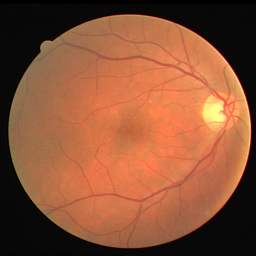


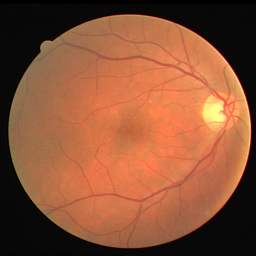


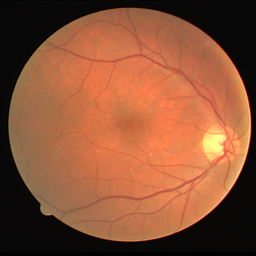


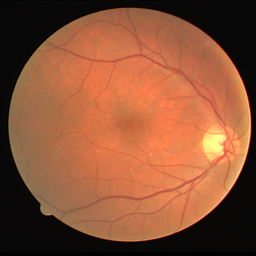


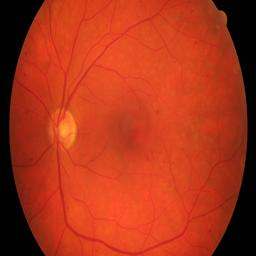


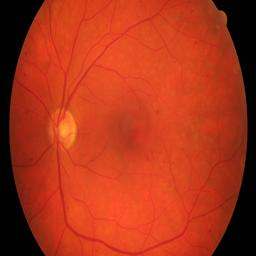


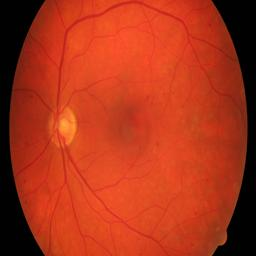


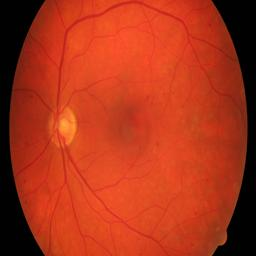


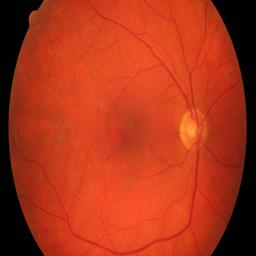


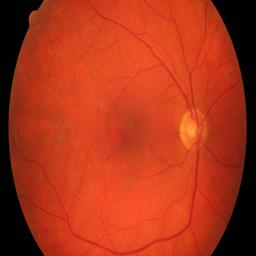


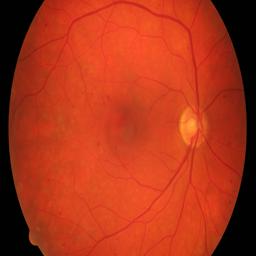


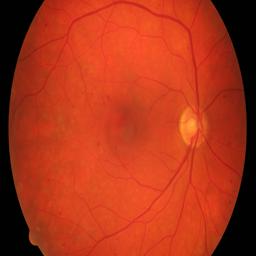

In [5]:
images_path='C:\\Users\\HP\\ga3\\DataSet\\training\\images'

training_data = []
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 training_data.append(np.asarray(image))
a=np.array(training_data)

vertical_img=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_TOP_BOTTOM)
 vertical_img.append(np.asarray(img))
vertical_img=np.array(vertical_img) 

horizontal_img=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_LEFT_RIGHT)
 horizontal_img.append(np.asarray(img))
horizontal_img=np.array(horizontal_img)

vertical_img_flip=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_TOP_BOTTOM)
 img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
 vertical_img_flip.append(np.asarray(img))
vertical_img_flip=np.array(vertical_img_flip) 

ipyplot.plot_images(a[[0]])
ipyplot.plot_images(vertical_img[[0]])
ipyplot.plot_images(horizontal_img[[0]])
ipyplot.plot_images(vertical_img_flip[[0]])


images_path='C:\\Users\\HP\\ga3\\HRF\\images'

hrf = []
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 hrf.append(np.asarray(image))
hrf=np.array(hrf)

hrf_v=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_TOP_BOTTOM)
 hrf_v.append(np.asarray(img))
hrf_v=np.array(hrf_v)

hrf_h=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_LEFT_RIGHT)
 hrf_h.append(np.asarray(img))
hrf_h=np.array(hrf_h)

hrf_vh=[]
for filename in os.listdir(images_path):
 path = os.path.join(images_path, filename)
 image=Image.open(path)
 img = image.transpose(method=Image.FLIP_TOP_BOTTOM)
 img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
 hrf_vh.append(np.asarray(img))
hrf_vh=np.array(hrf_vh)

ipyplot.plot_images(hrf[[0]])
ipyplot.plot_images(hrf_v[[0]])
ipyplot.plot_images(hrf_h[[0]])
ipyplot.plot_images(hrf_vh[[0]])

In [6]:
dataoutput=np.concatenate((a,vertical_img, horizontal_img, vertical_img_flip, hrf, hrf_v, hrf_h, hrf_vh))
dataoutput.shape

(260, 256, 256, 3)

In [7]:
original = dataInput
output = dataoutput
original = original.astype('float32')
output = output.astype('float32')
# Processes image as [-1,1]
original = (original - 127.5) / 127.5
output = (output - 127.5) / 127.5

In [8]:
image_shape=(256,256,3)

In [9]:
# define the discriminator model
def Discriminator(image_shape):

    init = RandomNormal(stddev=0.02)
    in_src_image = Input(shape=image_shape)
    in_target_image = Input(shape=image_shape)
    merged = Concatenate()([in_src_image, in_target_image])
    
    d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
    d = LeakyReLU(alpha=0.2)(d)
    
    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    
    d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    
    d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    
    d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    
    d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    patch_out = Activation('sigmoid')(d)
    
    model = Model([in_src_image, in_target_image], patch_out)

    return model

In [10]:
# compile model
d_opt = Adam(learning_rate=0.0002, beta_1=0.5)
d_model=Discriminator(image_shape)
d_model.compile(loss='binary_crossentropy', optimizer=d_opt, loss_weights=[0.5])
d_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256, 256, 6)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 6208        concatenate[0][0]            

In [11]:

def define_encoder_block(layer_in, n_filters, batchnorm=True):
    init = RandomNormal(stddev=0.02)
   
    g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    g = LeakyReLU(alpha=0.2)(g)
    return g

In [12]:

def decoder_block(layer_in, skip_in, n_filters, dropout=True):
    init = RandomNormal(stddev=0.02)
    
    g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
    g = BatchNormalization()(g, training=True)
    if dropout:
        g = Dropout(0.5)(g, training=True)
    g = Concatenate()([g, skip_in])
    g = Activation('relu')(g)
    return g

In [13]:
def Generator(image_shape=(256,256,3)):
   
    init = RandomNormal(stddev=0.02)
    
    in_image = Input(shape=image_shape)
    # encoder model
    e1 = define_encoder_block(in_image, 64, batchnorm=False)
    e2 = define_encoder_block(e1, 128)
    e3 = define_encoder_block(e2, 256)
    e4 = define_encoder_block(e3, 512)
    e5 = define_encoder_block(e4, 512)
    e6 = define_encoder_block(e5, 512)
    e7 = define_encoder_block(e6, 512)
    # bottleneck, no batch norm and relu
    b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
    b = Activation('relu')(b)
    # decoder model
    d1 = decoder_block(b, e7, 512)
    d2 = decoder_block(d1, e6, 512)
    d3 = decoder_block(d2, e5, 512)
    d4 = decoder_block(d3, e4, 512, dropout=False)
    d5 = decoder_block(d4, e3, 256, dropout=False)
    d6 = decoder_block(d5, e2, 128, dropout=False)
    d7 = decoder_block(d6, e1, 64, dropout=False)
    
    g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
    out_image = Activation('tanh')(g)
    
    model = Model(in_image, out_image)
    return model

In [14]:
g_model=Generator()
g_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 128, 128, 64) 3136        input_3[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_5 (LeakyReLU)       (None, 128, 128, 64) 0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 64, 64, 128)  131200      leaky_re_lu_5[0][0]              
____________________________________________________________________________________________

In [15]:
def GAN(g_model, d_model, image_shape):
    # make weights in the discriminator not trainable
    for layer in d_model.layers:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = False
    in_src = Input(shape=image_shape)
    gen_out = g_model(in_src)
    
    dis_out = d_model([in_src, gen_out])
    # src image as input, generated image and classification output
    model = Model(in_src, [dis_out, gen_out])

    return model

In [16]:
# compile model
gan_opt = Adam(learning_rate=0.0002, beta_1=0.5)
gan_model=GAN(g_model,d_model,image_shape)
gan_model.compile(loss=['binary_crossentropy', 'mae'], optimizer=gan_opt, loss_weights=[1,100])
gan_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
model_1 (Functional)            (None, 256, 256, 3)  54429315    input_4[0][0]                    
__________________________________________________________________________________________________
model (Functional)              (None, 16, 16, 1)    6968257     input_4[0][0]                    
                                                                 model_1[0][0]                    
Total params: 61,397,572
Trainable params: 54,422,275
Non-trainable params: 6,975,297
__________________________________________________________________________________________________


In [17]:
def generate_real_samples(original, output, n_samples, patch_shape):
    trainA = original
    trainB = output
    
    ix = randint(0, trainA.shape[0], n_samples)
    
    X1, X2 = trainA[ix], trainB[ix]
    
    y = ones((n_samples, patch_shape, patch_shape, 1))
    return [X1, X2], y


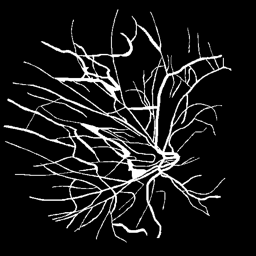


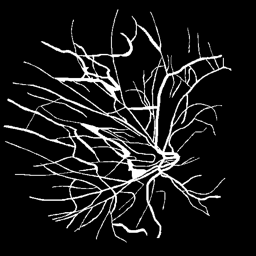


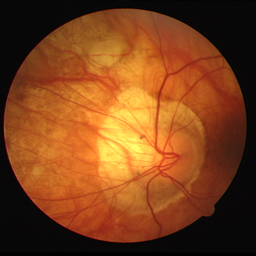


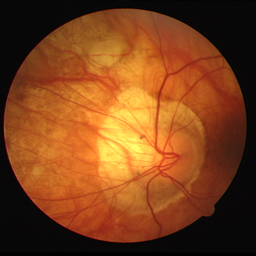

In [18]:
a,b=generate_real_samples(dataInput, dataoutput, 1, 16)
ipyplot.plot_images(a[0])
ipyplot.plot_images(a[1])


In [19]:
def generate_fake_samples(g_model, samples, patch_shape):
	X = g_model.predict(samples)
	
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [29]:
def summarize_performance(step, g_model, original, output, n_samples=3):
	[X_realA, X_realB], _ = generate_real_samples(original, output, n_samples, 1)
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to original
	X_realA = (X_realA + 1) / 2
	X_realB = (X_realB + 1) / 2
	X_fakeB = (X_fakeB + 1) / 2
	# plot real source images
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realB[i])
	# save plot to file
	filename1 = 'plot_%06d.png' % (step+1)
	pyplot.savefig(filename1, format='png')
	pyplot.close()
	# save the generator model
	filename2 = 'model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

In [32]:
from IPython.display import clear_output
import tensorflow as tf
def train(d_model, g_model, gan_model, original, output, n_epochs=300, n_batch=1):
	checkpoint_dir = './training_checkpoints'
	checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
	checkpoint = tf.train.Checkpoint(gan_opt=gan_opt,
								d_opt=d_opt,
								gan_model=gan_model,
								d_model=d_model,
								g_model=g_model)
	
	
	ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=60)
	if ckpt_manager.latest_checkpoint:
		checkpoint.restore(ckpt_manager.latest_checkpoint) 
		print ('Latest checkpoint restored  from '+ckpt_manager.latest_checkpoint)
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	trainA = original
	trainB = output
	
	bat_per_epo = int(len(trainA) / n_batch)
	n_steps = bat_per_epo * n_epochs
	
	for i in range(n_steps):
		[X_realA, X_realB], y_real = generate_real_samples(original, output, n_batch, n_patch)
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		#update discriminator
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		if (i+1) % (bat_per_epo * 5) == 0: 
			summarize_performance(i, g_model, original, output)
		if (i+1) % (bat_per_epo * 5) == 0:  
			clear_output(wait=True)
			ckpt_save_path = ckpt_manager.save()
			print ('Saving checkpoint for epoch {} at {}'.format(i+1,ckpt_save_path))


In [33]:
d_opt = Adam(learning_rate=0.0002, beta_1=0.5)
d_model = Discriminator(image_shape)
d_model.compile(loss='binary_crossentropy', optimizer=d_opt, loss_weights=[0.5])

g_model = Generator(image_shape)

gan_opt = Adam(learning_rate=0.0002, beta_1=0.5)
gan_model = GAN(g_model, d_model, image_shape)
gan_model.compile(loss=['binary_crossentropy', 'mae'], optimizer=gan_opt, loss_weights=[1,100])

# train model
train(d_model, g_model, gan_model, original, output)

Saving checkpoint for epoch 36400 at ./training_checkpoints\ckpt-28
>36401, d1[0.091] d2[0.082] g[4.180]
>36402, d1[0.140] d2[0.087] g[4.028]
>36403, d1[0.065] d2[0.074] g[4.057]
>36404, d1[0.116] d2[0.089] g[4.121]
>36405, d1[0.047] d2[0.072] g[4.773]
>36406, d1[0.173] d2[0.093] g[5.091]
>36407, d1[0.050] d2[0.073] g[5.083]
>36408, d1[0.036] d2[0.070] g[4.224]
>36409, d1[0.035] d2[0.066] g[4.028]
>36410, d1[0.032] d2[0.081] g[4.139]
>36411, d1[0.036] d2[0.078] g[4.257]
>36412, d1[0.039] d2[0.094] g[4.594]
>36413, d1[0.034] d2[0.094] g[4.007]
>36414, d1[0.048] d2[0.854] g[3.903]
>36415, d1[0.183] d2[0.205] g[4.103]
>36416, d1[0.136] d2[0.072] g[4.076]
>36417, d1[0.048] d2[0.069] g[4.112]
>36418, d1[0.190] d2[0.249] g[4.329]
>36419, d1[0.062] d2[0.075] g[4.250]
>36420, d1[0.188] d2[0.092] g[5.359]
>36421, d1[0.037] d2[0.132] g[4.685]
>36422, d1[0.100] d2[0.352] g[4.714]
>36423, d1[0.103] d2[0.320] g[4.335]
>36424, d1[0.209] d2[0.200] g[4.302]
>36425, d1[0.070] d2[0.209] g[4.066]
>36426,

KeyboardInterrupt: 